In [0]:
import os
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from scipy import stats
from pandas.plotting import scatter_matrix
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import sklearn.linear_model as skl_lm
from sklearn.ensemble import RandomForestClassifier

from sklearn.datasets import make_classification

from scipy import stats
import seaborn as sns; sns.set()

In [84]:
drive.mount('/content/drive', force_remount=True)
path = '/content/drive/Shared drives/Pendulum Analytics ELP Spring 2020/FinalData/Modified_Data'
name = '/MBS_GSE_RPT'
df = pd.read_csv(path+name+'.csv')

Mounted at /content/drive


In [85]:
!ls "/content/drive/Shared drives/Pendulum Analytics ELP Spring 2020/FinalData/Modified_Data"

 A_Discount_Note2001.csv	  MBS_GSE_RPT.gsheet
 Corporate_Investment_Grade.csv   MBS_GSE_RPT_Total2001.csv
 Corporate_Junk.csv		  MBS_GSE_RPT_Total2001.png
 Corporate_paper2001.csv	  MBS_GSE_RPT_Total.csv
 Corporate_paper.csv		  MBS_GSE_RPT_Total.png
 Corporate_Total2001.csv	  MBS_GSE_RPT_trans2001.csv
 Corporate_Total.csv		  MBS_GSE_RPT_trans.csv
 Corporate_Total.png		 'ML Output.gsheet'
 Coupons.csv			  ols
 Described_Data			  ols2001
 FA_coupons2001.csv		  Output
 FA_coupons.csv			  Plots
 FA_Discount_Note2001.csv	  Tbills2001.csv
 FA_Discount_Note.csv		  Tbills.csv
 FA_Total2001.csv		  Tbills_Total2001.csv
 FA_Total.csv			  Tbills_Total.csv
 Forest.ipynb			  Tbills_trans2001.csv
 GDP.xlsx			  Tbills_trans.csv
 Graphs				  Tests.csv
 MBS_GSE_RPT2001.csv		  Tips.csv
 MBS_GSE_RPT.csv		 'Tree plot'


In [86]:
df['Date'] = pd.to_datetime(df['Date'])  
df['Year'] = df['Date'].dt.year.astype(str)
df['Quarter'] = df['Date'].dt.quarter.astype(str)
df['Date2'] = df[['Year', 'Quarter']].agg('-'.join, axis=1)


df['9_11_lag'] = df['9_11'].shift(5)
df['NCF_lag'] = df['NCF'].shift(3)
df['CountryWide_lag'] = df['CountryWide'].shift(3)
df['Bear_lag'] = df['Bear'].shift(5)
df['September2008_lag'] = df['September2008'].shift(4)
df['TARP_lag'] = df['TARP'].shift(5)
df['Citi_BOA_lag'] = df['Citi_BOA'].shift(5)
df['Taper Tantrum_lag'] = df['Taper Tantrum'].shift(3)
df['2003_end_lag'] = df['2003_end'].shift(1)
df['2004_beg_lag'] = df['2004_beg'].shift(1)
df['Spread_lag'] = df['Spread'].shift(5)

if 'FF-GC' in df.columns:
  df['FF-GC_lag'] = df['FF-GC'].shift(5)
  df['FF-GC_change'] = (df['FF-GC'].shift(1)-df['FF-GC'])
if 'GC' in df.columns:
  df['GC_lag'] = df['GC'].shift(5)
  df['GC_change'] = (df['GC'].shift(1)-df['GC'])

if 'US_30_FRM' in df.columns:
  df['US_30_FRM_lag'] = df['US_30_FRM'].shift(5)
  df['US_30_FRM_change'] = (df['US_30_FRM'].shift(1)-df['US_30_FRM'])

if 'US_15_FRM' in df.columns:
  df['US_15_FRM_lag'] = df['US_15_FRM'].shift(5)
  df['US_15_FRM_change'] = (df['US_15_FRM'].shift(1)-df['US_15_FRM'])

if 'US_51_ARM' in df.columns:
  df['US_51_ARM_lag'] = df['US_51_ARM'].shift(5)
  df['US_51_ARM_change'] = (df['US_51_ARM'].shift(1)-df['US_51_ARM'])


df['1M_T_change'] = (df['1 Mo'].shift(1)-df['1 Mo'])

df['BAA10Y_lag'] = df['BAA10Y'].shift(5)

df['logspread']= np.log(df['Spread'])
df['10-2adj']= np.sqrt(df['10-2'])/10
df['Vixadj']=  (df['VIX Close']**(1/3))/10


df = df.fillna(0)
path1 = r'/content/drive/Shared drives/Pendulum Analytics ELP Spring 2020/FinalData/Modified_Data/'
df.to_csv(path1+name+'.csv')

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [87]:
df.columns

Index(['Unnamed: 0', 'Fails to Deliver', 'Fails to Recieve', 'Aggregate',
       'Fails D per total', 'Fails R per total', 'High trade day', '9_11',
       '2003_end', '2004_beg', 'NCF', 'CountryWide', 'Bear', 'September2008',
       'TARP', 'Citi_BOA', 'Taper Tantrum', 'Overnight in', '<30d in',
       '>30d in', 'Overnight out', '<30d out', '>30d out', 'Effective_Rate',
       'VIX Close', '1 Mo', '2 Mo', '3 Mo', '6 Mo', '1 Yr', '2 Yr', '3 Yr',
       '5 Yr', '7 Yr', '10 Yr', '20 Yr', '30 Yr', 'AVG Vol', 'Shape', 'BAA10Y',
       'Inflation', 'MBS_Total', 'MBS_Purchases_Issuances', 'MBS_Outstanding',
       'US_30_FRM', '30_Fees_points', 'US_15_FRM', '15_fees_points',
       'US_51_ARM', '51_fees_points', '51_margin', 'GC', 'FF-GC', '10-2',
       'Spread', 'Date', '9_11_lag', 'NCF_lag', 'CountryWide_lag', 'Bear_lag',
       'September2008_lag', 'TARP_lag', 'Citi_BOA_lag', 'Taper Tantrum_lag',
       '2003_end_lag', '2004_beg_lag', 'Spread_lag', 'FF-GC_lag',
       'FF-GC_change', 'G

In [88]:
display(df.head())

,Unnamed: 0,Fails to Deliver,Fails to Recieve,Aggregate,Fails D per total,Fails R per total,High trade day,9_11,2003_end,2004_beg,NCF,CountryWide,Bear,September2008,TARP,Citi_BOA,Taper Tantrum,Overnight in,<30d in,>30d in,Overnight out,<30d out,>30d out,Effective_Rate,VIX Close,1 Mo,2 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr,AVG Vol,Shape,BAA10Y,...,30_Fees_points,US_15_FRM,15_fees_points,US_51_ARM,51_fees_points,51_margin,GC,FF-GC,10-2,Spread,Date,9_11_lag,NCF_lag,CountryWide_lag,Bear_lag,September2008_lag,TARP_lag,Citi_BOA_lag,Taper Tantrum_lag,2003_end_lag,2004_beg_lag,Spread_lag,FF-GC_lag,FF-GC_change,GC_lag,GC_change,US_30_FRM_lag,US_30_FRM_change,US_15_FRM_lag,US_15_FRM_change,US_51_ARM_lag,US_51_ARM_change,1M_T_change,BAA10Y_lag,logspread,10-2adj,Vixadj,Date2,Year,Quarter
0,0,104320,62717,199789.4,0.522150,0.313916,0,0,0,0,0,0,0,0,0,0,0,51260.0,357018.0,357018.0,449381.0,225443.0,225443.0,2.25,14.09,2.04,0.0,2.33,2.63,2.83,3.22,3.39,3.73,4.02,4.29,4.88,0.0,0.017290,normal,1.83,...,0.0,0.00,0.0,0.00,0.0,0.00,2.285,-0.035,1.07,-1.90,2005-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.103441,0.241530,2005-1,2005,1
1,1,50234,47086,409697.2,0.122613,0.114929,1,0,0,0,0,0,0,0,0,0,0,55753.0,370133.0,370133.0,447148.0,237902.0,237902.0,2.25,12.56,2.01,0.0,2.34,2.64,2.84,3.22,3.38,3.72,4.00,4.25,4.81,0.0,0.021093,normal,1.81,...,0.7,5.21,0.6,5.03,0.5,2.78,2.248,0.002,1.03,-1.91,2005-01-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.037,0.0,0.037,0.0,-5.77,0.0,-5.21,0.0,-5.03,0.03,0.0,0.0,0.101489,0.232450,2005-1,2005,1
2,2,253904,237121,202195.5,1.255735,1.172731,0,0,0,0,0,0,0,0,0,0,0,52380.0,361856.0,361856.0,442381.0,246790.0,246790.0,2.19,13.18,1.95,0.0,2.37,2.69,2.88,3.26,3.42,3.73,3.97,4.20,4.71,0.0,0.025134,normal,1.76,...,0.6,5.19,0.6,5.05,0.5,2.79,2.259,-0.069,0.94,-1.97,2005-01-19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.071,0.0,-0.011,0.0,0.03,0.0,0.02,0.0,-0.02,0.06,0.0,0.0,0.096954,0.236214,2005-1,2005,1
3,3,133001,135422,191911.2,0.693034,0.705649,0,0,0,0,0,0,0,0,0,0,0,54719.0,366141.0,366141.0,468141.0,239208.0,239208.0,2.33,13.44,2.16,0.0,2.41,2.71,2.90,3.27,3.43,3.73,3.98,4.21,4.72,0.0,0.025147,normal,1.76,...,0.7,5.15,0.7,5.05,0.6,2.79,2.318,0.012,0.94,-1.97,2005-01-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.081,0.0,-0.059,0.0,0.07,0.0,0.04,0.0,0.00,-0.21,0.0,0.0,0.096954,0.237757,2005-1,2005,1
4,4,62699,65522,241466.6,0.259659,0.271350,0,0,0,0,0,0,0,0,0,0,0,59033.0,371109.0,371109.0,461396.0,235644.0,235644.0,2.29,11.66,2.22,0.0,2.51,2.76,2.95,3.32,3.47,3.73,3.93,4.15,4.63,0.0,0.026641,normal,1.73,...,0.0,0.00,0.0,0.00,0.0,0.00,2.482,-0.192,0.83,-2.00,2005-02-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.204,0.0,-0.164,0.0,5.67,0.0,5.15,0.0,5.05,-0.06,0.0,0.0,0.091104,0.226760,2005-1,2005,1


In [0]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.drop(df.columns[0], axis=1) 

In [90]:
df.columns

Index(['Fails to Deliver', 'Fails to Recieve', 'Aggregate',
       'Fails D per total', 'Fails R per total', 'High trade day', '9_11',
       '2003_end', '2004_beg', 'NCF', 'CountryWide', 'Bear', 'September2008',
       'TARP', 'Citi_BOA', 'Taper Tantrum', 'Overnight in', '<30d in',
       '>30d in', 'Overnight out', '<30d out', '>30d out', 'Effective_Rate',
       'VIX Close', '1 Mo', '2 Mo', '3 Mo', '6 Mo', '1 Yr', '2 Yr', '3 Yr',
       '5 Yr', '7 Yr', '10 Yr', '20 Yr', '30 Yr', 'AVG Vol', 'Shape', 'BAA10Y',
       'Inflation', 'MBS_Total', 'MBS_Purchases_Issuances', 'MBS_Outstanding',
       'US_30_FRM', '30_Fees_points', 'US_15_FRM', '15_fees_points',
       'US_51_ARM', '51_fees_points', '51_margin', 'GC', 'FF-GC', '10-2',
       'Spread', 'Date', '9_11_lag', 'NCF_lag', 'CountryWide_lag', 'Bear_lag',
       'September2008_lag', 'TARP_lag', 'Citi_BOA_lag', 'Taper Tantrum_lag',
       '2003_end_lag', '2004_beg_lag', 'Spread_lag', 'FF-GC_lag',
       'FF-GC_change', 'GC_lag', 'GC_ch

In [91]:
df.head()

,Fails to Deliver,Fails to Recieve,Aggregate,Fails D per total,Fails R per total,High trade day,9_11,2003_end,2004_beg,NCF,CountryWide,Bear,September2008,TARP,Citi_BOA,Taper Tantrum,Overnight in,<30d in,>30d in,Overnight out,<30d out,>30d out,Effective_Rate,VIX Close,1 Mo,2 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr,AVG Vol,Shape,BAA10Y,Inflation,...,30_Fees_points,US_15_FRM,15_fees_points,US_51_ARM,51_fees_points,51_margin,GC,FF-GC,10-2,Spread,Date,9_11_lag,NCF_lag,CountryWide_lag,Bear_lag,September2008_lag,TARP_lag,Citi_BOA_lag,Taper Tantrum_lag,2003_end_lag,2004_beg_lag,Spread_lag,FF-GC_lag,FF-GC_change,GC_lag,GC_change,US_30_FRM_lag,US_30_FRM_change,US_15_FRM_lag,US_15_FRM_change,US_51_ARM_lag,US_51_ARM_change,1M_T_change,BAA10Y_lag,logspread,10-2adj,Vixadj,Date2,Year,Quarter
0,104320,62717,199789.4,0.522150,0.313916,0,0,0,0,0,0,0,0,0,0,0,51260.0,357018.0,357018.0,449381.0,225443.0,225443.0,2.25,14.09,2.04,0.0,2.33,2.63,2.83,3.22,3.39,3.73,4.02,4.29,4.88,0.0,0.017290,normal,1.83,2.97,...,0.0,0.00,0.0,0.00,0.0,0.00,2.285,-0.035,1.07,-1.90,2005-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.103441,0.241530,2005-1,2005,1
1,50234,47086,409697.2,0.122613,0.114929,1,0,0,0,0,0,0,0,0,0,0,55753.0,370133.0,370133.0,447148.0,237902.0,237902.0,2.25,12.56,2.01,0.0,2.34,2.64,2.84,3.22,3.38,3.72,4.00,4.25,4.81,0.0,0.021093,normal,1.81,2.97,...,0.7,5.21,0.6,5.03,0.5,2.78,2.248,0.002,1.03,-1.91,2005-01-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.037,0.0,0.037,0.0,-5.77,0.0,-5.21,0.0,-5.03,0.03,0.0,0.0,0.101489,0.232450,2005-1,2005,1
2,253904,237121,202195.5,1.255735,1.172731,0,0,0,0,0,0,0,0,0,0,0,52380.0,361856.0,361856.0,442381.0,246790.0,246790.0,2.19,13.18,1.95,0.0,2.37,2.69,2.88,3.26,3.42,3.73,3.97,4.20,4.71,0.0,0.025134,normal,1.76,2.97,...,0.6,5.19,0.6,5.05,0.5,2.79,2.259,-0.069,0.94,-1.97,2005-01-19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.071,0.0,-0.011,0.0,0.03,0.0,0.02,0.0,-0.02,0.06,0.0,0.0,0.096954,0.236214,2005-1,2005,1
3,133001,135422,191911.2,0.693034,0.705649,0,0,0,0,0,0,0,0,0,0,0,54719.0,366141.0,366141.0,468141.0,239208.0,239208.0,2.33,13.44,2.16,0.0,2.41,2.71,2.90,3.27,3.43,3.73,3.98,4.21,4.72,0.0,0.025147,normal,1.76,2.97,...,0.7,5.15,0.7,5.05,0.6,2.79,2.318,0.012,0.94,-1.97,2005-01-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.081,0.0,-0.059,0.0,0.07,0.0,0.04,0.0,0.00,-0.21,0.0,0.0,0.096954,0.237757,2005-1,2005,1
4,62699,65522,241466.6,0.259659,0.271350,0,0,0,0,0,0,0,0,0,0,0,59033.0,371109.0,371109.0,461396.0,235644.0,235644.0,2.29,11.66,2.22,0.0,2.51,2.76,2.95,3.32,3.47,3.73,3.93,4.15,4.63,0.0,0.026641,normal,1.73,3.01,...,0.0,0.00,0.0,0.00,0.0,0.00,2.482,-0.192,0.83,-2.00,2005-02-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.204,0.0,-0.164,0.0,5.67,0.0,5.15,0.0,5.05,-0.06,0.0,0.0,0.091104,0.226760,2005-1,2005,1


In [0]:

df = df.fillna(0)

In [93]:
df.columns
col = list(df.columns[1:])
col

['Fails to Recieve',
 'Aggregate',
 'Fails D per total',
 'Fails R per total',
 'High trade day',
 '9_11',
 '2003_end',
 '2004_beg',
 'NCF',
 'CountryWide',
 'Bear',
 'September2008',
 'TARP',
 'Citi_BOA',
 'Taper Tantrum',
 'Overnight in',
 '<30d in',
 '>30d in',
 'Overnight out',
 '<30d out',
 '>30d out',
 'Effective_Rate',
 'VIX Close',
 '1 Mo',
 '2 Mo',
 '3 Mo',
 '6 Mo',
 '1 Yr',
 '2 Yr',
 '3 Yr',
 '5 Yr',
 '7 Yr',
 '10 Yr',
 '20 Yr',
 '30 Yr',
 'AVG Vol',
 'Shape',
 'BAA10Y',
 'Inflation',
 'MBS_Total',
 'MBS_Purchases_Issuances',
 'MBS_Outstanding',
 'US_30_FRM',
 '30_Fees_points',
 'US_15_FRM',
 '15_fees_points',
 'US_51_ARM',
 '51_fees_points',
 '51_margin',
 'GC',
 'FF-GC',
 '10-2',
 'Spread',
 'Date',
 '9_11_lag',
 'NCF_lag',
 'CountryWide_lag',
 'Bear_lag',
 'September2008_lag',
 'TARP_lag',
 'Citi_BOA_lag',
 'Taper Tantrum_lag',
 '2003_end_lag',
 '2004_beg_lag',
 'Spread_lag',
 'FF-GC_lag',
 'FF-GC_change',
 'GC_lag',
 'GC_change',
 'US_30_FRM_lag',
 'US_30_FRM_change',
 'U

In [94]:
df = df.drop_duplicates().reset_index(drop = True)
print(df.shape)
print(df.columns)

(790, 84)
Index(['Fails to Deliver', 'Fails to Recieve', 'Aggregate',
       'Fails D per total', 'Fails R per total', 'High trade day', '9_11',
       '2003_end', '2004_beg', 'NCF', 'CountryWide', 'Bear', 'September2008',
       'TARP', 'Citi_BOA', 'Taper Tantrum', 'Overnight in', '<30d in',
       '>30d in', 'Overnight out', '<30d out', '>30d out', 'Effective_Rate',
       'VIX Close', '1 Mo', '2 Mo', '3 Mo', '6 Mo', '1 Yr', '2 Yr', '3 Yr',
       '5 Yr', '7 Yr', '10 Yr', '20 Yr', '30 Yr', 'AVG Vol', 'Shape', 'BAA10Y',
       'Inflation', 'MBS_Total', 'MBS_Purchases_Issuances', 'MBS_Outstanding',
       'US_30_FRM', '30_Fees_points', 'US_15_FRM', '15_fees_points',
       'US_51_ARM', '51_fees_points', '51_margin', 'GC', 'FF-GC', '10-2',
       'Spread', 'Date', '9_11_lag', 'NCF_lag', 'CountryWide_lag', 'Bear_lag',
       'September2008_lag', 'TARP_lag', 'Citi_BOA_lag', 'Taper Tantrum_lag',
       '2003_end_lag', '2004_beg_lag', 'Spread_lag', 'FF-GC_lag',
       'FF-GC_change', 'GC_la

In [0]:
all1 = [#'Fails to Deliver', 
        #'Fails to Recieve', 
        #'Aggregate',
        #'Fails D per total', 
        #'Fails R per total', 
        'High trade day', 
        '9_11',
       '2003_end', 
        '2004_beg', 
        'NCF', 
        'CountryWide', 
        'Bear', 
        'September2008',
       'TARP', 
        'Citi_BOA', 
        'Taper Tantrum', 
        'Overnight in', 
        '<30d in',
       '>30d in', 
        'Overnight out', 
        '<30d out', 
        '>30d out', 
        'Effective_Rate',
       'VIX Close', 
        #'1 Mo', 
        #'2 Mo', 
        #'3 Mo', 
        #'6 Mo', 
        #'1 Yr',
        #'2 Yr', 
        #'3 Yr',
       #'5 Yr', 
        #'7 Yr', 
        #'10 Yr', 
        #'20 Yr',
        #'30 Yr',
        #'AVG Vol', 
        #'Shape', 
        'BAA10Y',
       'Inflation', 
        'MBS_Total',
        'MBS_Purchases_Issuances', 
        'MBS_Outstanding',
       #'US_30_FRM', 
        '30_Fees_points', 
        'US_15_FRM',
        '15_fees_points',
       'US_51_ARM',
        '51_fees_points', 
        '51_margin', 
        'GC', 
        'FF-GC', 
        '10-2',
       #'Spread', 
        #'Date', 
        '9_11_lag', 
        'NCF_lag', 
        'CountryWide_lag', 
        'Bear_lag',
       'September2008_lag', 
        'TARP_lag', 
        'Citi_BOA_lag', 
        'Taper Tantrum_lag',
       '2003_end_lag', 
        '2004_beg_lag', 
        'Spread_lag', 
        #'FF-GC_lag',
       #'FF-GC_change', 
        'GC_lag', 
        #'GC_change', 
        'US_30_FRM_lag',
       'US_30_FRM_change', 
        'US_15_FRM_lag', 
        'US_15_FRM_change',
       'US_51_ARM_lag', 
        'US_51_ARM_change', 
        '1M_T_change', 
        'BAA10Y_lag',
       'logspread', 
        '10-2adj', 
        'Vixadj', 
        #'Date2', 
        #'Year', 
        #'Quarter'
        ]

In [0]:
all2 = [#'Fails to Deliver', 
        #'Fails to Recieve', 
        #'Aggregate',
        #'Fails D per total', 
        #'Fails R per total', 
        #'High trade day', 
        '9_11',
       '2003_end', 
        '2004_beg', 
        'NCF', 
        'CountryWide', 
        'Bear', 
        'September2008',
       'TARP', 
        'Citi_BOA', 
        'Taper Tantrum', 
        'Overnight in', 
        '<30d in',
       '>30d in', 
        'Overnight out', 
        '<30d out', 
        '>30d out', 
        'Effective_Rate',
       'VIX Close', 
        #'1 Mo', 
        #'2 Mo', 
        #'3 Mo', 
        #'6 Mo', 
        #'1 Yr',
        #'2 Yr', 
        #'3 Yr',
       #'5 Yr', 
        #'7 Yr', 
        #'10 Yr', 
        #'20 Yr',
        #'30 Yr',
        #'AVG Vol', 
        #'Shape', 
        'BAA10Y',
       'Inflation', 
        'MBS_Total',
        'MBS_Purchases_Issuances', 
        'MBS_Outstanding',
       #'US_30_FRM', 
        #'30_Fees_points', 
        #'US_15_FRM',
        '15_fees_points',
       #'US_51_ARM',
        #'51_fees_points', 
        #'51_margin', 
        'GC', 
        'FF-GC', 
        '10-2',
       #'Spread', 
        #'Date', 
        '9_11_lag', 
        'NCF_lag', 
        'CountryWide_lag', 
        'Bear_lag',
       'September2008_lag', 
        'TARP_lag', 
        #'Citi_BOA_lag', 
        'Taper Tantrum_lag',
       #'2003_end_lag', 
        #'2004_beg_lag', 
        'Spread_lag', 
        #'FF-GC_lag',
       #'FF-GC_change', 
        'GC_lag', 
        #'GC_change', 
        #'US_30_FRM_lag',
       #'US_30_FRM_change', 
        #'US_15_FRM_lag', 
        #'US_15_FRM_change',
       #'US_51_ARM_lag', 
        #'US_51_ARM_change', 
        #'1M_T_change', 
        #'BAA10Y_lag',
       'logspread', 
        '10-2adj', 
        'Vixadj', 
        #'Date2', 
        #'Year', 
        #'Quarter'
        ]

In [0]:
y_train = df['Fails D per total']

X = df[all2] 
X2 = sm.add_constant(X)
X_train = X

Forest

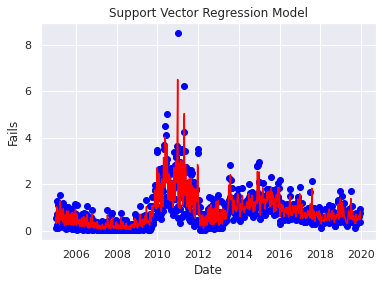

R^2:  0.9279623040454269


MBS_Outstanding            1.063590e-01
GC_lag                     1.017272e-01
10-2                       8.603553e-02
Spread_lag                 6.499547e-02
Overnight in               6.283693e-02
Overnight out              6.079041e-02
10-2adj                    5.970223e-02
Effective_Rate             5.320490e-02
<30d out                   5.129262e-02
GC                         4.820544e-02
FF-GC                      3.622315e-02
VIX Close                  3.388172e-02
Vixadj                     3.257708e-02
Inflation                  2.828373e-02
logspread                  2.779802e-02
>30d out                   2.749042e-02
BAA10Y                     2.380172e-02
MBS_Total                  2.208920e-02
MBS_Purchases_Issuances    1.971339e-02
>30d in                    1.897172e-02
<30d in                    1.833023e-02
15_fees_points             1.508081e-02
Taper Tantrum_lag          4.183992e-04
Bear                       1.206082e-04
Taper Tantrum              1.530877e-05


In [160]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
from subprocess import call
from IPython.display import Image

clf = RandomForestRegressor(n_estimators=50, random_state=0)
clf.fit(X_train, y_train)
tree = clf.estimators_[20]

importance = clf.feature_importances_
indices = np.argsort(importance)[::-1]
importance = pd.Series(importance,index=X_train.columns).sort_values(ascending=False)


plt.scatter(df['Date'], y_train, color = 'blue')
plt.plot(df['Date'], clf.predict(X_train), color = 'red')
plt.title('Support Vector Regression Model')
plt.xlabel('Date')
plt.ylabel('Fails')
plt.show()
print('R^2: ', clf.score(X_train, y_train))
importance

In [161]:
for i in range(0,len(importance)):
    if sum(importance[0:i])>0.9:
        break
X_trainIMP = X_train[importance[0:i].index]
X_trainIMP.columns

Index(['MBS_Outstanding', 'GC_lag', '10-2', 'Spread_lag', 'Overnight in',
       'Overnight out', '10-2adj', 'Effective_Rate', '<30d out', 'GC', 'FF-GC',
       'VIX Close', 'Vixadj', 'Inflation', 'logspread', '>30d out', 'BAA10Y'],
      dtype='object')

SVR

In [0]:
from sklearn import svm
from sklearn.svm import SVR
from sklearn import preprocessing
from sklearn import utils


from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RepeatedKFold


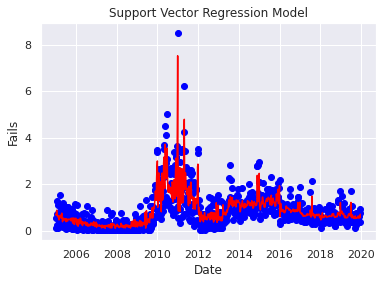

MBS_Outstanding            0.133905
Effective_Rate             0.091402
GC_lag                     0.090822
GC                         0.081013
Spread_lag                 0.071177
<30d out                   0.069604
10-2adj                    0.061569
10-2                       0.059761
Overnight out              0.052204
>30d out                   0.047953
Overnight in               0.042743
logspread                  0.030582
Inflation                  0.030166
>30d in                    0.025146
MBS_Total                  0.025103
VIX Close                  0.017478
FF-GC                      0.015259
<30d in                    0.014223
Vixadj                     0.012367
BAA10Y                     0.012149
15_fees_points             0.011885
MBS_Purchases_Issuances    0.003368
Taper Tantrum              0.000122
NCF_lag                    0.000000
CountryWide_lag            0.000000
Bear_lag                   0.000000
September2008_lag          0.000000
TARP_lag                   0

In [163]:
X_train
y_train

model = GradientBoostingRegressor()
model.fit(X_train,y_train)
#learning_rate = .1, max_depth = 3, n_estimators = 100, alpha = .1,
#learning_rate = .1     lower is better
#criterion = 'friedman_mse' or 'mae'
#max_depth = 3
#alpha = .1
#n_estimators = 100    lower might be better

importance = model.feature_importances_
indices = np.argsort(importance)[::-1]
importance = pd.Series(importance,index=X_train.columns).sort_values(ascending=False)

plt.scatter(df['Date'], y_train, color = 'blue')
plt.plot(df['Date'], model.predict(X_train), color = 'red')
plt.title('Support Vector Regression Model')
plt.xlabel('Date')
plt.ylabel('Fails')
plt.show()

print(importance)
print('R^2: ', model.score(X_train, y_train))

In [0]:
#pip install xgboost
import xgboost
from xgboost import XGBRegressor

MAE: -0.383 (0.050)


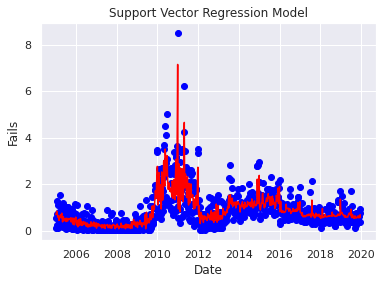

MBS_Outstanding            0.179037
Effective_Rate             0.121582
GC_lag                     0.109784
Spread_lag                 0.098311
GC                         0.063338
<30d out                   0.060275
<30d in                    0.046633
10-2                       0.044772
Overnight out              0.033667
logspread                  0.033008
Inflation                  0.032587
VIX Close                  0.032033
Overnight in               0.029227
MBS_Total                  0.024930
15_fees_points             0.021332
BAA10Y                     0.016420
>30d in                    0.014497
FF-GC                      0.014455
MBS_Purchases_Issuances    0.010649
>30d out                   0.008032
Taper Tantrum              0.003390
Bear                       0.002038
Citi_BOA                   0.000000
September2008              0.000000
CountryWide                0.000000
NCF                        0.000000
2004_beg                   0.000000
2003_end                   0

In [166]:
X_trainXG = X_train.values

model= XGBRegressor(objective='reg:squarederror')
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_trainXG, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
print('MAE: %.3f (%.3f)'%(np.mean(n_scores),np.std(n_scores)))
model= XGBRegressor(objective='reg:squarederror')
model.fit(X_trainXG,y_train)

importance = model.feature_importances_
indices = np.argsort(importance)[::-1]
importance = pd.Series(importance,index=X_train.columns).sort_values(ascending=False)

plt.scatter(df['Date'], y_train, color = 'blue')
plt.plot(df['Date'], model.predict(X_trainXG), color = 'red')
plt.title('Support Vector Regression Model')
plt.xlabel('Date')
plt.ylabel('Fails')
plt.show()

print(importance)
print('R^2: ',model.score(X_trainXG, y_train))
